In [28]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import Image



Loading training,testing and validation dataset

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory('C:/Users/arjun/OneDrive - Abertay University/Desktop/AI_CMP304_UNIT2/DATA/chest_xray/chest_xray/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')



Found 5216 images belonging to 2 classes.


In [30]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_set = test_datagen.flow_from_directory('C:/Users/arjun/OneDrive - Abertay University/Desktop/AI_CMP304_UNIT2/DATA/chest_xray/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 624 images belonging to 2 classes.


In [31]:
val_datagen = ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
val_set = val_datagen.flow_from_directory('C:/Users/arjun/OneDrive - Abertay University/Desktop/AI_CMP304_UNIT2/DATA/chest_xray/val',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')


Found 16 images belonging to 2 classes.


In [32]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=10, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=10, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=10, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=10, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=5, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = cnn.fit(x=training_set, validation_data=test_set, epochs = 50)

print(history.history)


cnn.save('my_model')

Epoch 1/50
163/163 [==============================] - 64s 386ms/step - loss: 0.6163 - accuracy: 0.7377 - val_loss: 0.6846 - val_accuracy: 0.6250
Epoch 2/50
163/163 [==============================] - 64s 394ms/step - loss: 0.4389 - accuracy: 0.7906 - val_loss: 0.6458 - val_accuracy: 0.7356
Epoch 3/50
163/163 [==============================] - 55s 340ms/step - loss: 0.2646 - accuracy: 0.8871 - val_loss: 0.5641 - val_accuracy: 0.7660
Epoch 4/50
163/163 [==============================] - 58s 355ms/step - loss: 0.2389 - accuracy: 0.8999 - val_loss: 0.4530 - val_accuracy: 0.8141
Epoch 5/50
163/163 [==============================] - 65s 396ms/step - loss: 0.2209 - accuracy: 0.9084 - val_loss: 0.3975 - val_accuracy: 0.8349
Epoch 6/50
163/163 [==============================] - 59s 361ms/step - loss: 0.2107 - accuracy: 0.9145 - val_loss: 0.5036 - val_accuracy: 0.8093
Epoch 7/50
163/163 [==============================] - 57s 348ms/step - loss: 0.1882 - accuracy: 0.9227 - val_loss: 0.4681 - val_ac

In [33]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [34]:
acc = cnn.evaluate_generator(generator= test_set)[1]

print(f"The accuracy is = {acc*100} %")

C:\Users\arjun\AppData\Local\Temp\ipykernel_14828\180498992.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = cnn.evaluate_generator(generator= test_set)[1]


The accuracy is = 90.06410241127014 %


NORMAL


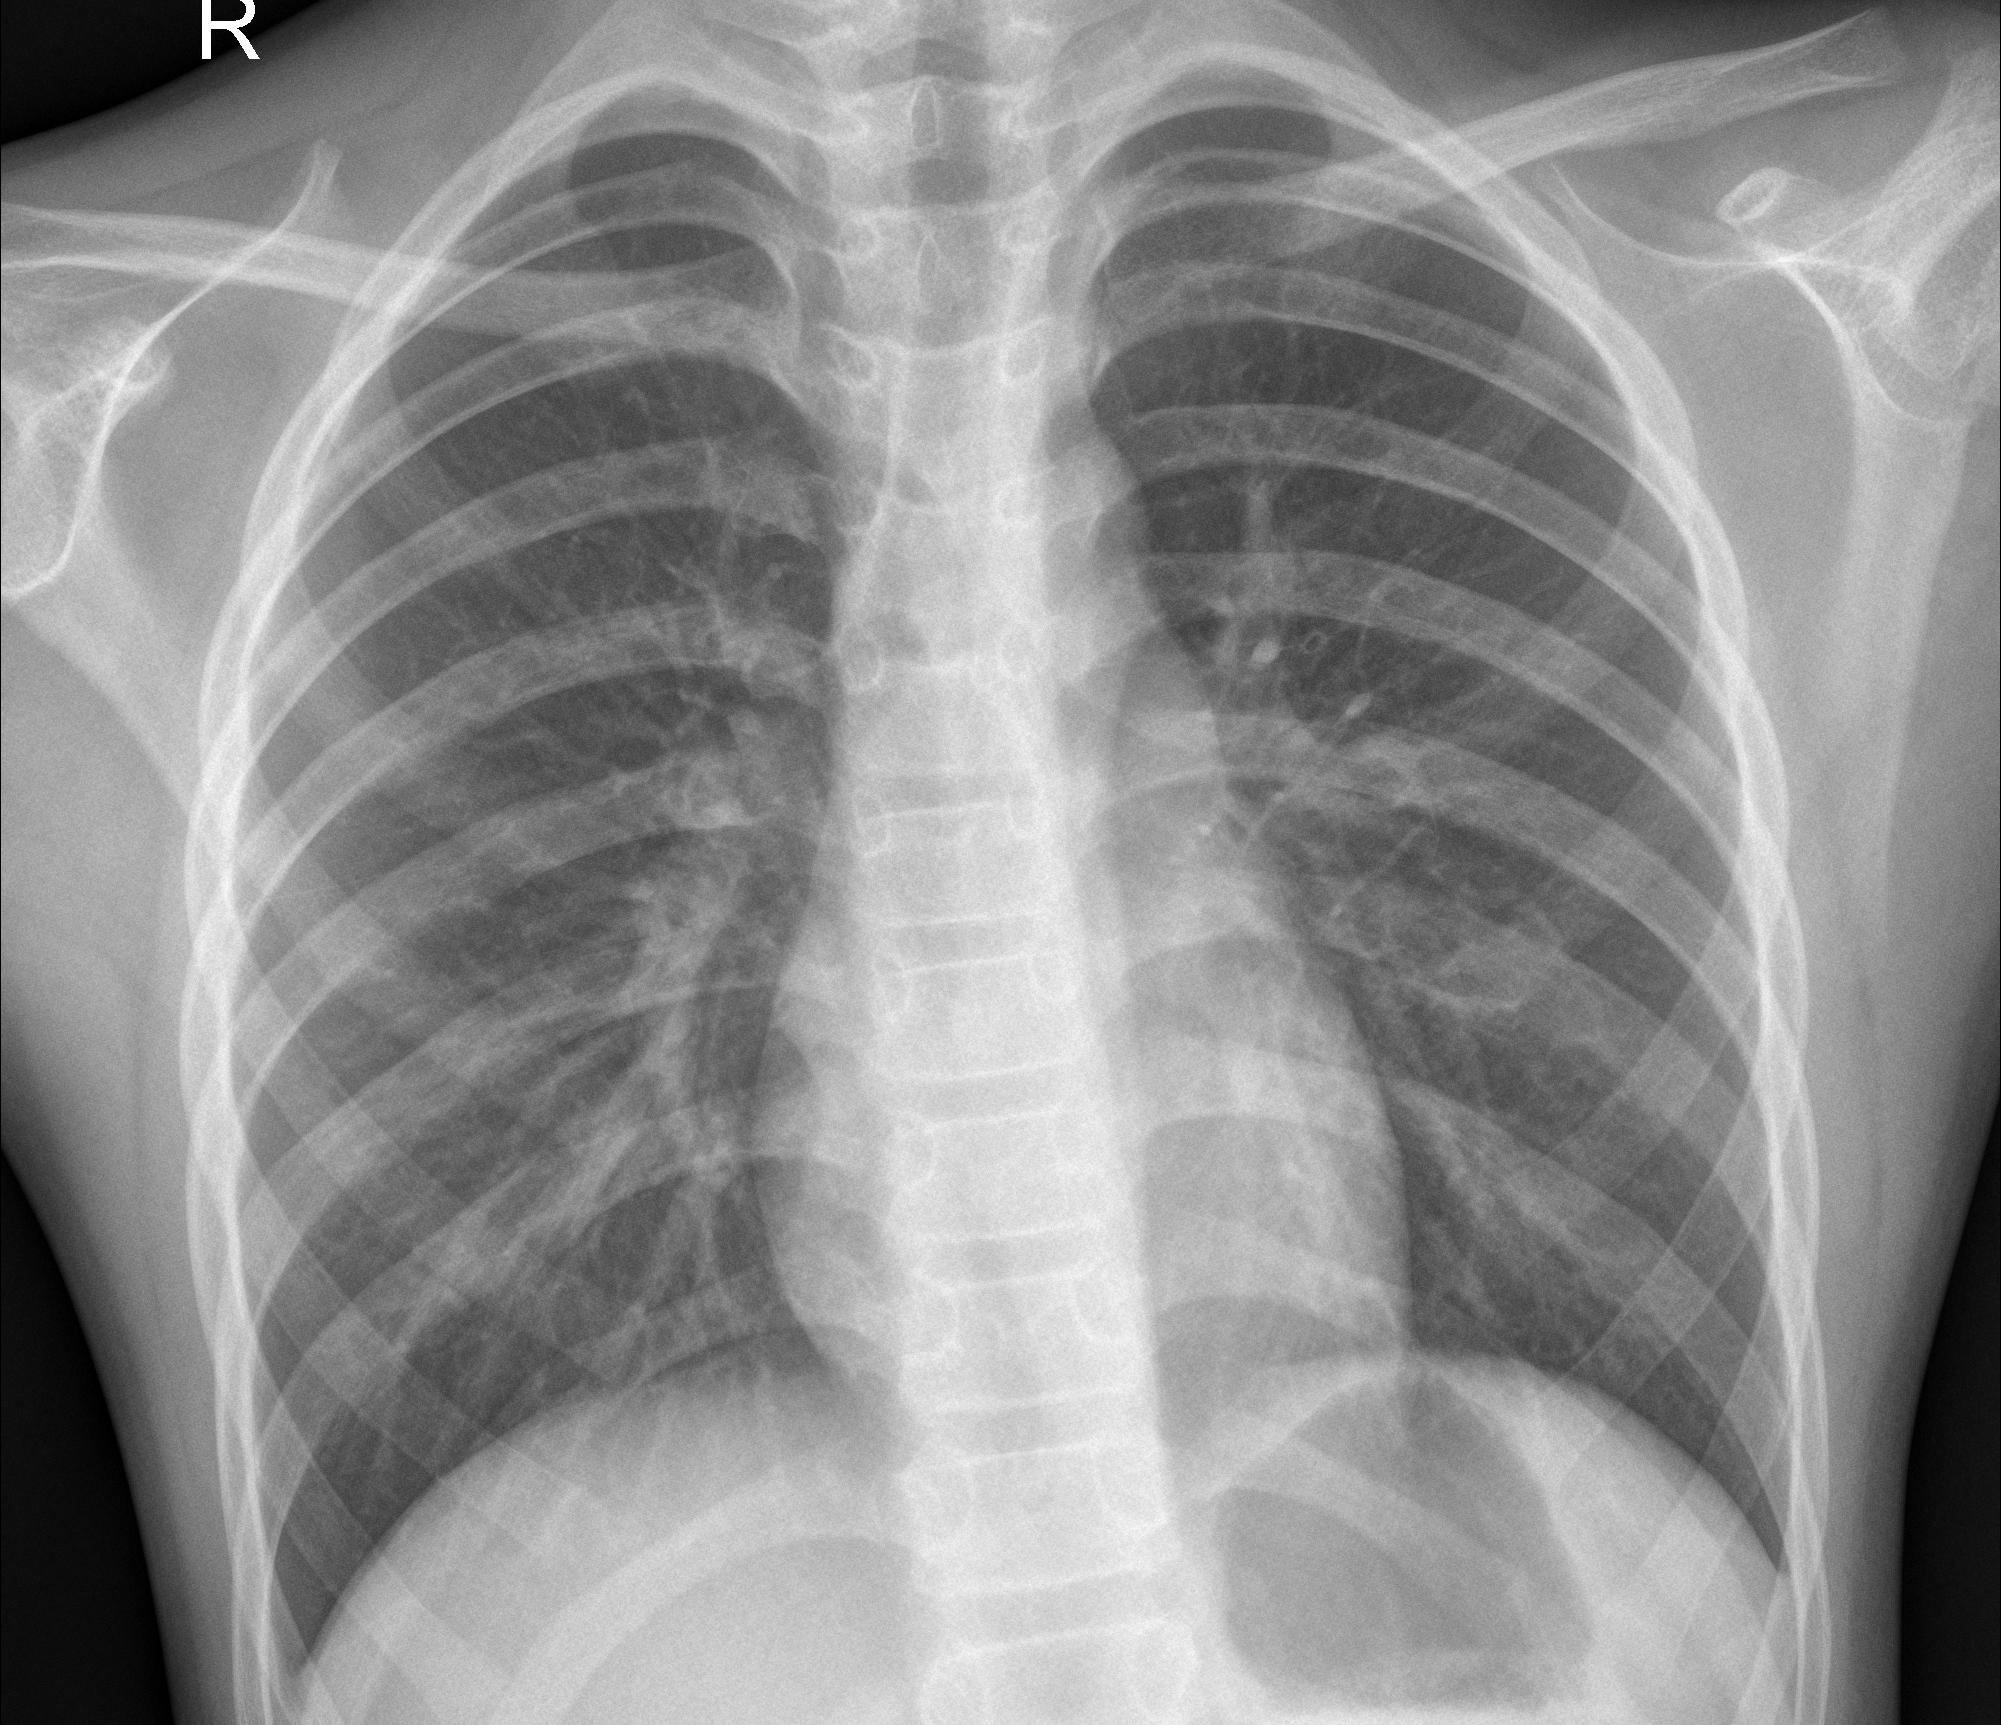

In [45]:
test_image = image.load_img(r'C:\Users\arjun\OneDrive - Abertay University\Desktop\AI_CMP304_UNIT2\DATA\chest_xray\test\NORMAL\IM-0046-0001.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result == 0:
    print('NORMAL')
else:
    print('PNEUMONIA')
    
Image(r"C:\Users\arjun\OneDrive - Abertay University\Desktop\AI_CMP304_UNIT2\DATA\chest_xray\test\NORMAL\IM-0046-0001.jpeg")    
  

PNEUMONIA


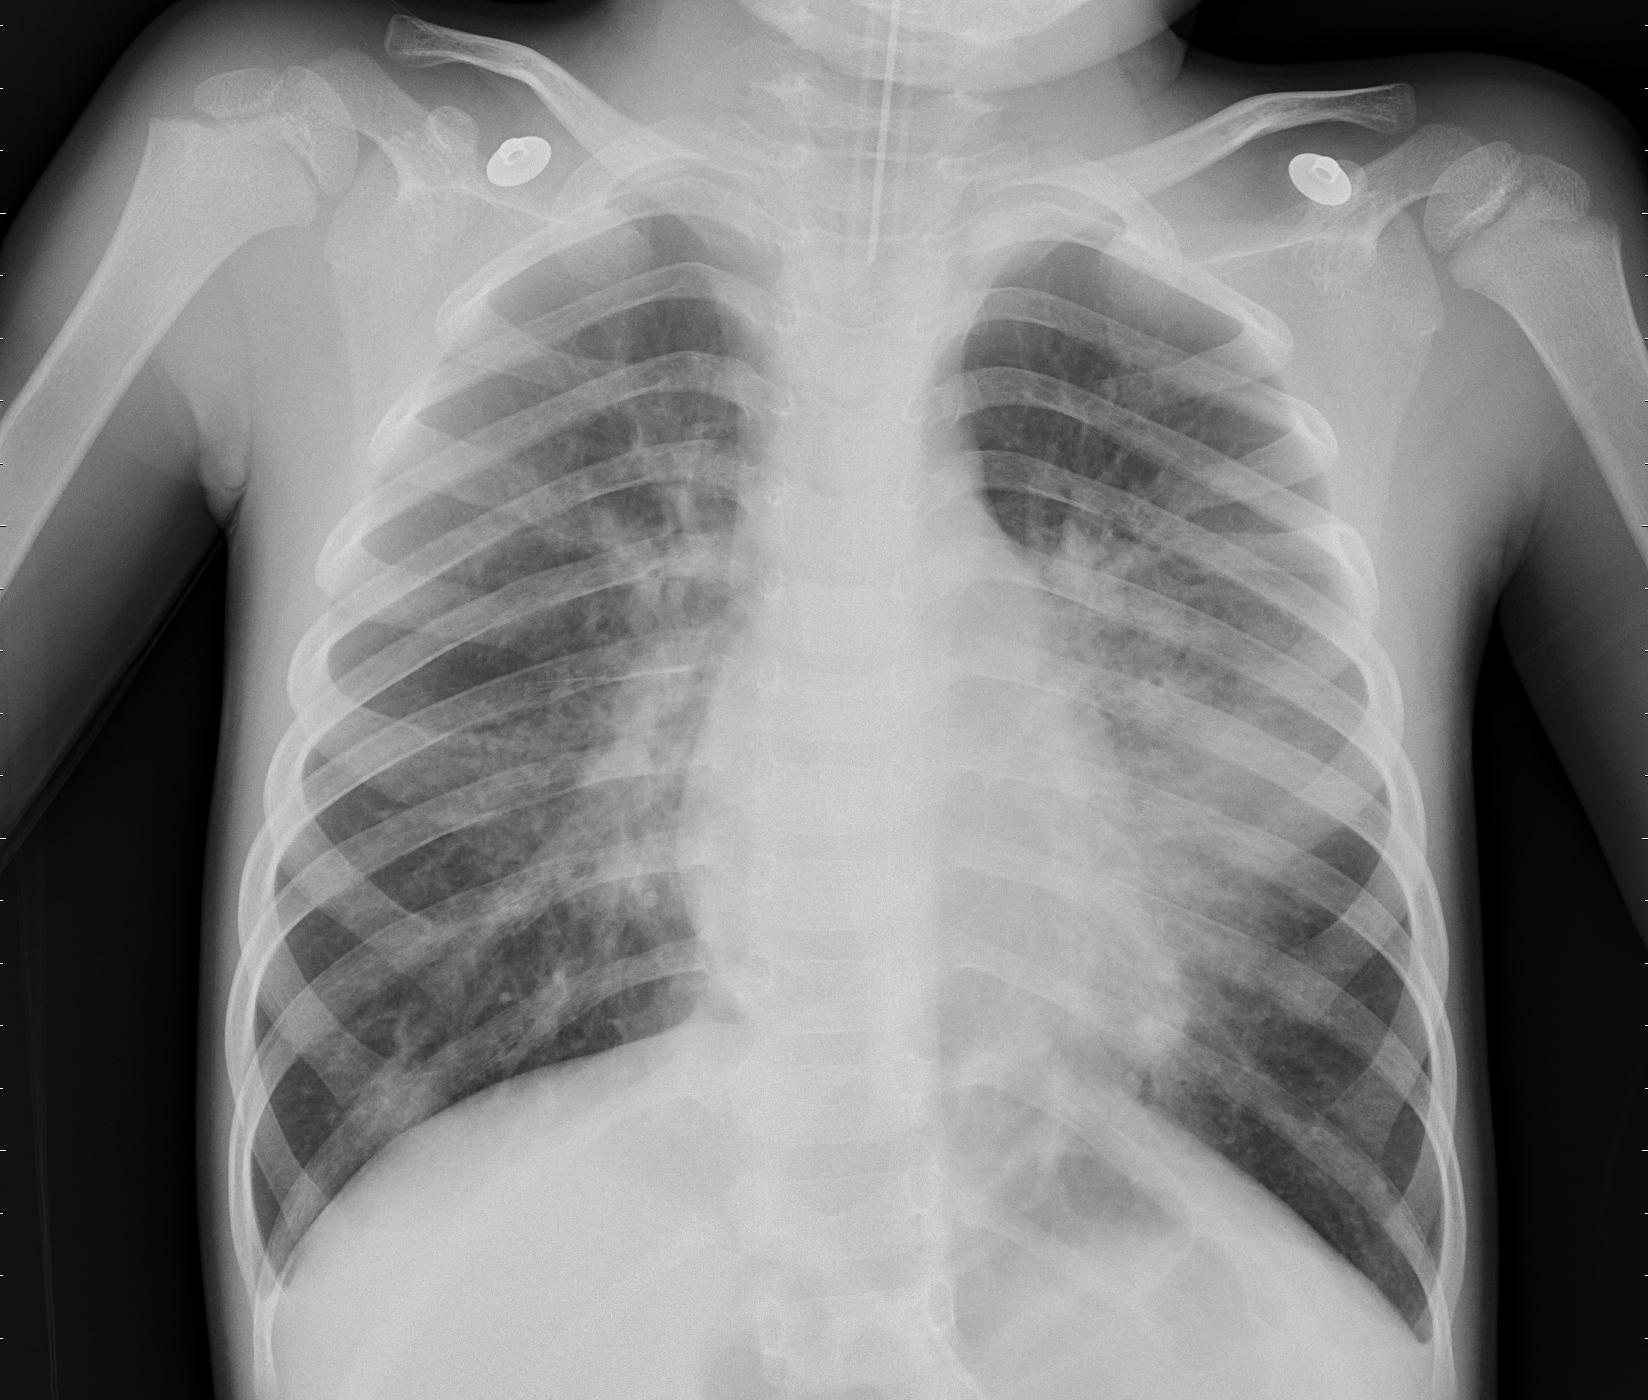

In [46]:
test_image = image.load_img(r'C:\Users\arjun\OneDrive - Abertay University\Desktop\AI_CMP304_UNIT2\DATA\chest_xray\test\PNEUMONIA\person34_virus_76.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result == 0:
    print('NORMAL')
else:
    print('PNEUMONIA')
    
Image(r"C:\Users\arjun\OneDrive - Abertay University\Desktop\AI_CMP304_UNIT2\DATA\chest_xray\test\PNEUMONIA\person34_virus_76.jpeg")    


PNEUMONIA


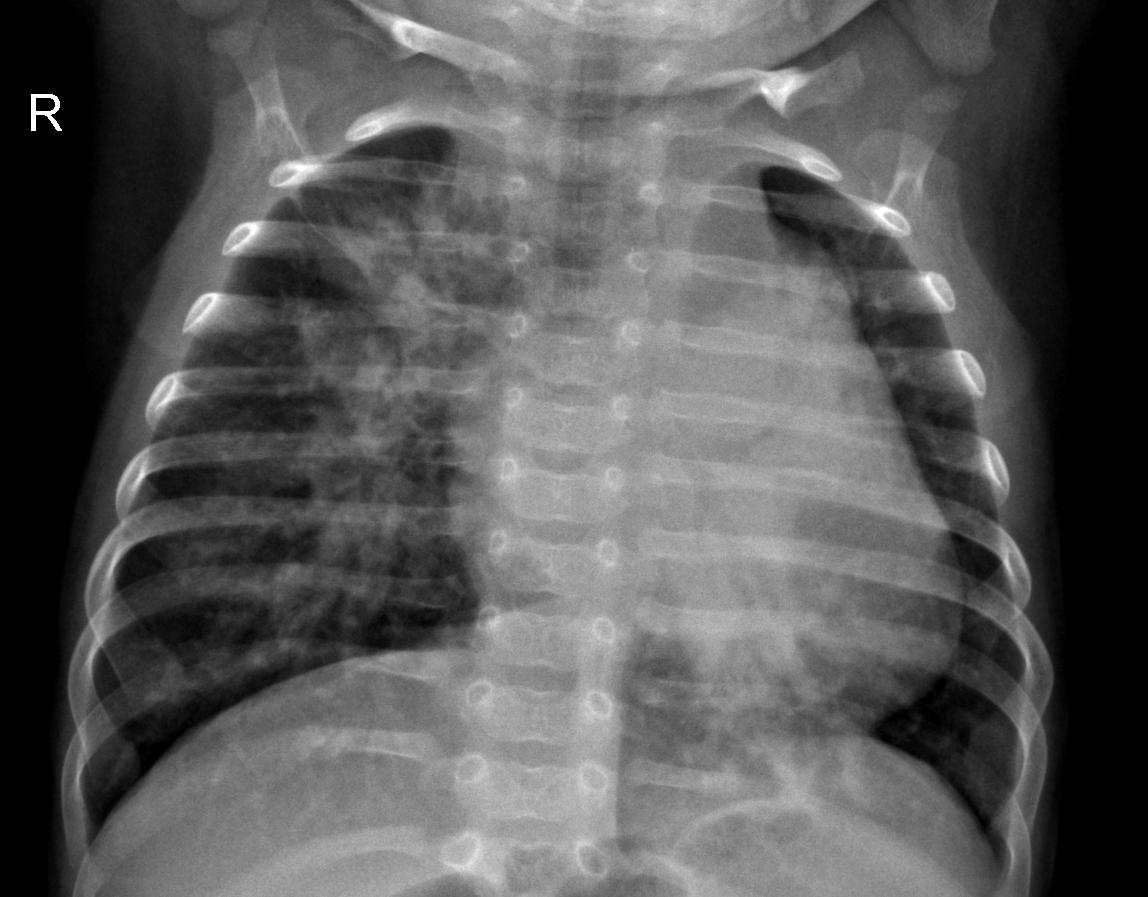

In [47]:
test_image = image.load_img(r'C:\Users\arjun\OneDrive - Abertay University\Desktop\TestImage.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result == 0:
    print('NORMAL')
else:
    print('PNEUMONIA')
    
Image(r"C:\Users\arjun\OneDrive - Abertay University\Desktop\TestImage.jpeg")

NORMAL


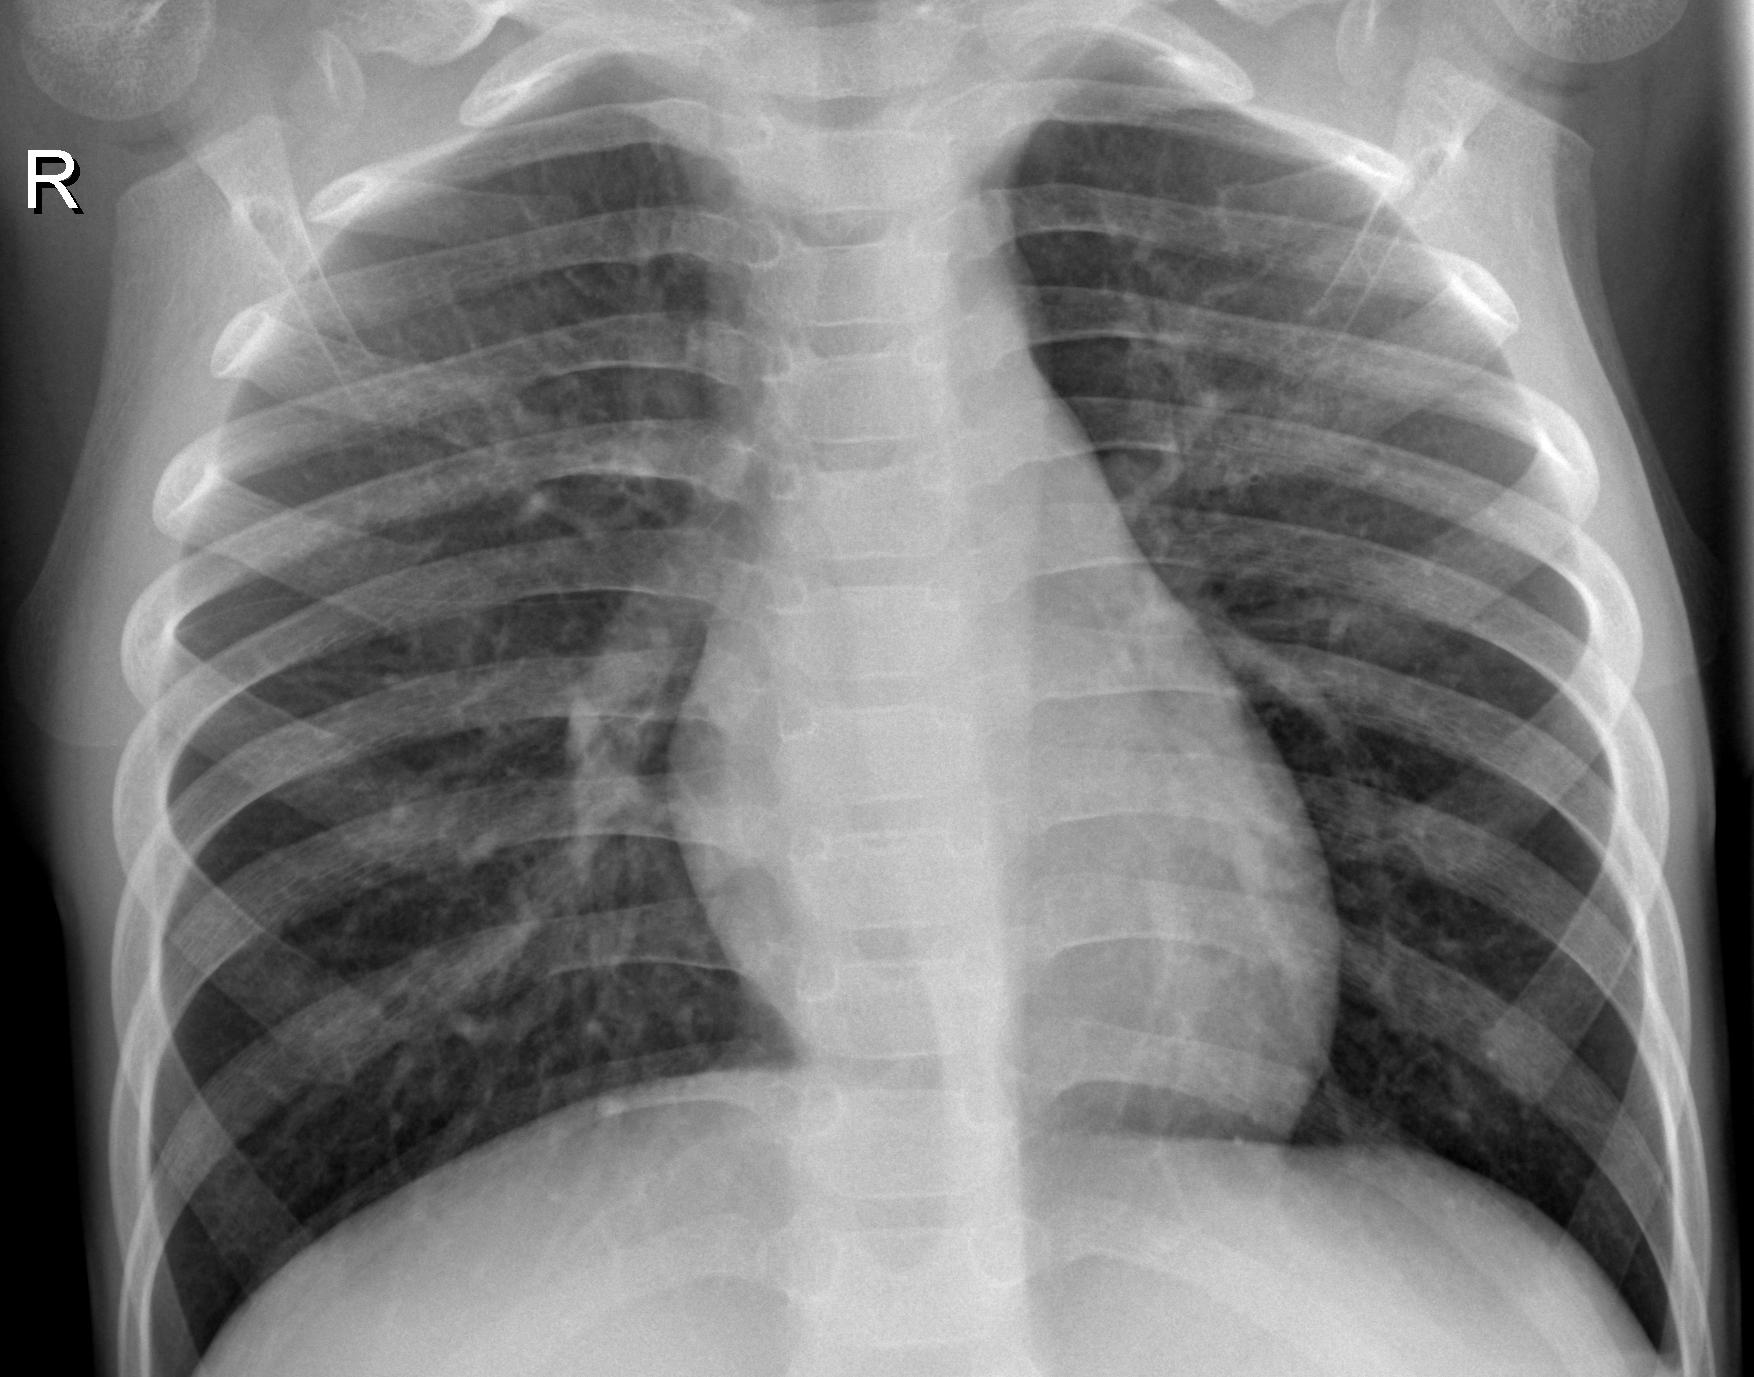

In [48]:
test_image = image.load_img(r'C:\Users\arjun\OneDrive - Abertay University\Desktop\TestImage2.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result == 0:
    print('NORMAL')
else:
    print('PNEUMONIA')
    
Image(r"C:\Users\arjun\OneDrive - Abertay University\Desktop\TestImage2.jpeg")

In [39]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=10,verbose=1) 
   


print(history.history.keys())

Epoch 1/10
163/163 [==============================] - 59s 364ms/step - loss: 0.1052 - accuracy: 0.9630 - val_loss: 0.4675 - val_accuracy: 0.8478
Epoch 2/10
163/163 [==============================] - 58s 357ms/step - loss: 0.1011 - accuracy: 0.9618 - val_loss: 0.4289 - val_accuracy: 0.8606
Epoch 3/10
163/163 [==============================] - 59s 363ms/step - loss: 0.1056 - accuracy: 0.9617 - val_loss: 0.5731 - val_accuracy: 0.8157
Epoch 4/10
163/163 [==============================] - 57s 349ms/step - loss: 0.1113 - accuracy: 0.9590 - val_loss: 0.3058 - val_accuracy: 0.8974
Epoch 5/10
163/163 [==============================] - 55s 340ms/step - loss: 0.0954 - accuracy: 0.9643 - val_loss: 0.3789 - val_accuracy: 0.8990
Epoch 6/10
163/163 [==============================] - 58s 354ms/step - loss: 0.1015 - accuracy: 0.9592 - val_loss: 0.3327 - val_accuracy: 0.9087
Epoch 7/10
163/163 [==============================] - 60s 365ms/step - loss: 0.0926 - accuracy: 0.9653 - val_loss: 0.4290 - val_ac

In [40]:
print(history.history)

{'loss': [0.10523297637701035, 0.1011398434638977, 0.10555494576692581, 0.11134442687034607, 0.09539680182933807, 0.1014736145734787, 0.09256619215011597, 0.1009339913725853, 0.09166106581687927, 0.09621665626764297], 'accuracy': [0.9629984498023987, 0.9618481397628784, 0.9616564512252808, 0.9589723944664001, 0.9643405079841614, 0.9591640830039978, 0.9652990698814392, 0.9605061411857605, 0.9651073813438416, 0.9639570713043213], 'val_loss': [0.46745550632476807, 0.42885130643844604, 0.5731187462806702, 0.3058379590511322, 0.3789280652999878, 0.33265426754951477, 0.42896437644958496, 0.35366249084472656, 0.5985286831855774, 0.5490478873252869], 'val_accuracy': [0.8477563858032227, 0.8605769276618958, 0.8157051205635071, 0.8974359035491943, 0.8990384340286255, 0.9086538553237915, 0.8782051205635071, 0.8814102411270142, 0.8349359035491943, 0.8621794581413269]}


In [41]:
df1 = pd.DataFrame(history.history)
df1


,loss,accuracy,val_loss,val_accuracy
0,0.105233,0.962998,0.467456,0.847756
1,0.101140,0.961848,0.428851,0.860577
2,0.105555,0.961656,0.573119,0.815705
3,0.111344,0.958972,0.305838,0.897436
4,0.095397,0.964341,0.378928,0.899038
5,0.101474,0.959164,0.332654,0.908654
6,0.092566,0.965299,0.428964,0.878205
7,0.100934,0.960506,0.353662,0.881410
8,0.091661,0.965107,0.598529,0.834936
9,0.096217,0.963957,0.549048,0.862179


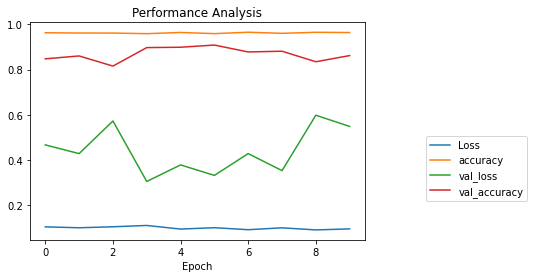

In [42]:
plt.plot(df1["loss"],label="Loss")
plt.plot(df1["accuracy"],label="accuracy")
plt.plot(df1["val_loss"],label="val_loss")
plt.plot(df1["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.title("Performance Analysis")
plt.legend(loc="upper right",bbox_to_anchor=(1.5,0.5))